In [73]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as dm
import numpy as np
from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt

In [25]:
total_df = pd.read_csv('../results/ALL_CMR_W.csv')
females_df = pd.read_csv('../results/ALL_CMR_FEMALES_W.csv')
males_df = pd.read_csv('../results/ALL_CMR_MALES_W.csv')

In [26]:
males_df

,name_normalized_x,powiat_numer,year,week,age_group,deaths,name_normalized_y,population,CMR
0,Biała Podlaska,661,2000,T01,TOTAL,5,Biała Podlaska,27914,17.912159
1,Biała Podlaska,661,2000,T02,TOTAL,4,Biała Podlaska,27914,14.329727
2,Biała Podlaska,661,2000,T03,TOTAL,4,Biała Podlaska,27914,14.329727
3,Biała Podlaska,661,2000,T04,TOTAL,4,Biała Podlaska,27914,14.329727
4,Biała Podlaska,661,2000,T05,TOTAL,3,Biała Podlaska,27914,10.747295
...,...,...,...,...,...,...,...,...,...
8109637,żywiecki,2417,2021,T48,Y_LT5,0,żywiecki,3908,0.000000
8109638,żywiecki,2417,2021,T49,Y_LT5,0,żywiecki,3908,0.000000
8109639,żywiecki,2417,2021,T50,Y_LT5,0,żywiecki,3908,0.000000
8109640,żywiecki,2417,2021,T51,Y_LT5,0,żywiecki,3908,0.000000


In [4]:
total_df.query("week == 'T53'")

,name_normalized_x,powiat_numer,year,week,age_group,deaths,name_normalized_y,population,CMR
3588,Biała Podlaska,661,2004,T53,TOTAL,8,Biała Podlaska,58047,13.781935
3641,Biała Podlaska,661,2004,T53,Y10-14,0,Biała Podlaska,4130,0.000000
3694,Biała Podlaska,661,2004,T53,Y15-19,0,Biała Podlaska,5642,0.000000
3747,Biała Podlaska,661,2004,T53,Y20-24,0,Biała Podlaska,5660,0.000000
3800,Biała Podlaska,661,2004,T53,Y25-29,0,Biała Podlaska,4531,0.000000
...,...,...,...,...,...,...,...,...,...
8108441,żywiecki,2417,2020,T53,Y70-74,6,żywiecki,6828,87.873462
8108494,żywiecki,2417,2020,T53,Y75-79,0,żywiecki,3969,0.000000
8108547,żywiecki,2417,2020,T53,Y80-84,6,żywiecki,3400,176.470588
8108600,żywiecki,2417,2020,T53,Y_GE85,9,żywiecki,5956,151.108126


In [7]:

# Create a date range with weekly frequenc
date_range = pd.date_range(start='2000-01-03', end='2021-12-27', freq='W-MON')

# Convert the date range to a DataFrame
df = pd.DataFrame(date_range, columns=['date'])

# Extract the week number from the date
df['week'] = df['date'].dt.isocalendar().week

# Format the week number as a string with the desired format (T01..T53)
df['week'] = df['week'].apply(lambda x: f'T{x:02d}')

df['year'] = df['date'].dt.isocalendar().year

# Display the DataFrame
print(df)


           date week  year
0    2000-01-03  T01  2000
1    2000-01-10  T02  2000
2    2000-01-17  T03  2000
3    2000-01-24  T04  2000
4    2000-01-31  T05  2000
...         ...  ...   ...
1143 2021-11-29  T48  2021
1144 2021-12-06  T49  2021
1145 2021-12-13  T50  2021
1146 2021-12-20  T51  2021
1147 2021-12-27  T52  2021

[1148 rows x 3 columns]


In [77]:
total_df = pd.merge(total_df, df, on=['week', 'year'])
total_df['gender'] = 'TOTAL'

In [79]:
total_df.to_csv('../results/aLL_CMR_W_DATES.csv')

In [27]:
males_df = pd.merge(males_df, df, on=['week', 'year'])
males_df['gender'] = 'MALE'

In [31]:
males_df

,name_normalized_x,powiat_numer,year,week,age_group,deaths,name_normalized_y,population,CMR,date,gender
0,Biała Podlaska,661,2000,T01,TOTAL,5,Biała Podlaska,27914,17.912159,2000-01-03,MALE
1,Biała Podlaska,661,2000,T01,Y10-14,0,Biała Podlaska,2880,0.000000,2000-01-03,MALE
2,Biała Podlaska,661,2000,T01,Y15-19,0,Biała Podlaska,2942,0.000000,2000-01-03,MALE
3,Biała Podlaska,661,2000,T01,Y20-24,0,Biała Podlaska,2390,0.000000,2000-01-03,MALE
4,Biała Podlaska,661,2000,T01,Y25-29,1,Biała Podlaska,2151,46.490005,2000-01-03,MALE
...,...,...,...,...,...,...,...,...,...,...,...
8109637,żywiecki,2417,2021,T52,Y70-74,6,żywiecki,3126,191.938580,2021-12-27,MALE
8109638,żywiecki,2417,2021,T52,Y75-79,3,żywiecki,1561,192.184497,2021-12-27,MALE
8109639,żywiecki,2417,2021,T52,Y80-84,2,żywiecki,1123,178.094390,2021-12-27,MALE
8109640,żywiecki,2417,2021,T52,Y_GE85,9,żywiecki,1488,604.838710,2021-12-27,MALE


In [32]:
females_df = pd.merge(females_df, df, on=['week', 'year'])
females_df['gender'] = 'FEMALE'

In [33]:
males_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8109642 entries, 0 to 8109641
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   name_normalized_x  object        
 1   powiat_numer       int64         
 2   year               int64         
 3   week               object        
 4   age_group          object        
 5   deaths             int64         
 6   name_normalized_y  object        
 7   population         int64         
 8   CMR                float64       
 9   date               datetime64[ns]
 10  gender             object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 680.6+ MB


In [34]:
females_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8109642 entries, 0 to 8109641
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   name_normalized_x  object        
 1   powiat_numer       int64         
 2   year               int64         
 3   week               object        
 4   age_group          object        
 5   deaths             int64         
 6   name_normalized_y  object        
 7   population         int64         
 8   CMR                float64       
 9   date               datetime64[ns]
 10  gender             object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 680.6+ MB


In [35]:
sum(females_df['name_normalized_x'].isna())

0

In [36]:
genders_df = pd.concat([males_df, females_df], axis=0)

In [37]:
genders_df

,name_normalized_x,powiat_numer,year,week,age_group,deaths,name_normalized_y,population,CMR,date,gender
0,Biała Podlaska,661,2000,T01,TOTAL,5,Biała Podlaska,27914,17.912159,2000-01-03,MALE
1,Biała Podlaska,661,2000,T01,Y10-14,0,Biała Podlaska,2880,0.000000,2000-01-03,MALE
2,Biała Podlaska,661,2000,T01,Y15-19,0,Biała Podlaska,2942,0.000000,2000-01-03,MALE
3,Biała Podlaska,661,2000,T01,Y20-24,0,Biała Podlaska,2390,0.000000,2000-01-03,MALE
4,Biała Podlaska,661,2000,T01,Y25-29,1,Biała Podlaska,2151,46.490005,2000-01-03,MALE
...,...,...,...,...,...,...,...,...,...,...,...
8109637,żywiecki,2417,2021,T52,Y70-74,5,żywiecki,4023,124.285359,2021-12-27,FEMALE
8109638,żywiecki,2417,2021,T52,Y75-79,2,żywiecki,2498,80.064051,2021-12-27,FEMALE
8109639,żywiecki,2417,2021,T52,Y80-84,2,żywiecki,2119,94.384143,2021-12-27,FEMALE
8109640,żywiecki,2417,2021,T52,Y_GE85,8,żywiecki,4348,183.992640,2021-12-27,FEMALE


In [38]:
pre_pandemic_df = genders_df.query('year < 2020')
post_pandemic_df = genders_df.query('year >= 2020')

In [65]:
len(pre_pandemic_df)

14703084

In [49]:
pre_pandemic_df.to_csv('../results/PRE_PANDEMIC_GENDER.csv', index=False)

In [ ]:
post_pandemic_df.to_csv('../results/POST_PANDEMIC_GENDER.csv', index=False)

In [41]:
total_male_df = pre_pandemic_df.query('age_group == "TOTAL" and gender == "MALE"')

In [51]:
total_male_df.query('name_normalized_x == "Wrocław"')

,name_normalized_x,powiat_numer,year,week,age_group,deaths,name_normalized_y,population,CMR,date,gender
825,Wrocław,264,2000,T01,TOTAL,97,Wrocław,301502,32.172258,2000-01-03,MALE
6420,Wrocław,264,2000,T02,TOTAL,82,Wrocław,301502,27.197166,2000-01-10,MALE
12015,Wrocław,264,2000,T03,TOTAL,85,Wrocław,301502,28.192184,2000-01-17,MALE
17610,Wrocław,264,2000,T04,TOTAL,68,Wrocław,301502,22.553748,2000-01-24,MALE
23205,Wrocław,264,2000,T05,TOTAL,86,Wrocław,301502,28.523857,2000-01-31,MALE
...,...,...,...,...,...,...,...,...,...,...,...
7316506,Wrocław,264,2019,T48,TOTAL,57,Wrocław,300293,18.981461,2019-11-25,MALE
7323726,Wrocław,264,2019,T49,TOTAL,61,Wrocław,300293,20.313494,2019-12-02,MALE
7330946,Wrocław,264,2019,T50,TOTAL,58,Wrocław,300293,19.314470,2019-12-09,MALE
7338166,Wrocław,264,2019,T51,TOTAL,62,Wrocław,300293,20.646502,2019-12-16,MALE


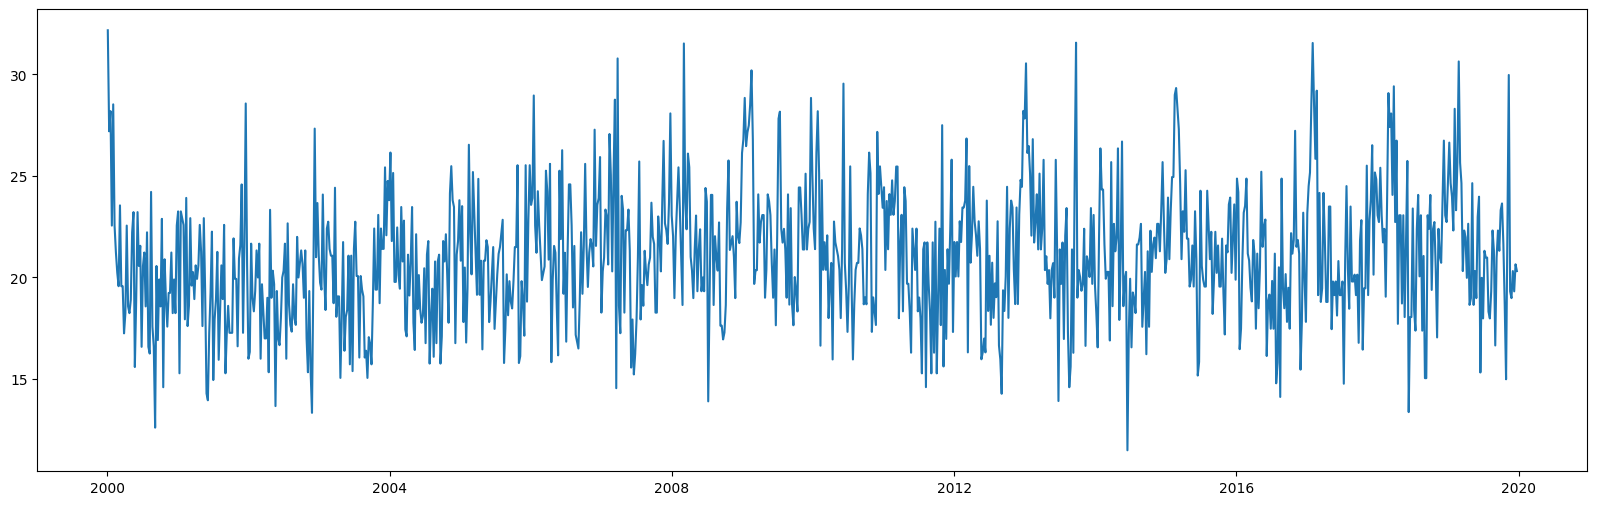

In [52]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(total_male_df.query('name_normalized_x == "Wrocław"').date,
         total_male_df.query('name_normalized_x == "Wrocław"').CMR)

In [58]:
total_male_df_copy = total_male_df.copy()

In [61]:
total_male_df_copy['powiat_numer'] = total_male_df_copy['powiat_numer'].astype('str')
total_male_df_copy['year'] = total_male_df_copy['year'].astype('str')

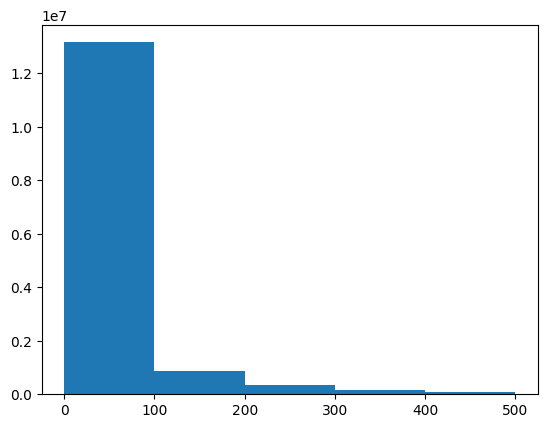

In [72]:
plt.hist(pre_pandemic_df['CMR'], bins=[0, 100, 200, 300, 400, 500])
plt.show()

In [71]:
np.max(pre_pandemic_df['CMR'])

3658.5365853658536

## Pierwszy model -Autoregressive Poisson model

In [74]:
Wroclaw_df = pre_pandemic_df.query('name_normalized_x == "Wrocław"')

In [75]:
Wroclaw_df

,name_normalized_x,powiat_numer,year,week,age_group,deaths,name_normalized_y,population,CMR,date,gender
825,Wrocław,264,2000,T01,TOTAL,97,Wrocław,301502,32.172258,2000-01-03,MALE
826,Wrocław,264,2000,T01,Y10-14,0,Wrocław,18291,0.000000,2000-01-03,MALE
827,Wrocław,264,2000,T01,Y15-19,1,Wrocław,26899,3.717610,2000-01-03,MALE
828,Wrocław,264,2000,T01,Y20-24,0,Wrocław,32559,0.000000,2000-01-03,MALE
829,Wrocław,264,2000,T01,Y25-29,0,Wrocław,24921,0.000000,2000-01-03,MALE
...,...,...,...,...,...,...,...,...,...,...,...
7345400,Wrocław,264,2019,T52,Y70-74,10,Wrocław,19571,51.096009,2019-12-23,FEMALE
7345401,Wrocław,264,2019,T52,Y75-79,11,Wrocław,11723,93.832637,2019-12-23,FEMALE
7345402,Wrocław,264,2019,T52,Y80-84,11,Wrocław,11301,97.336519,2019-12-23,FEMALE
7345403,Wrocław,264,2019,T52,Y_GE85,27,Wrocław,26430,102.156640,2019-12-23,FEMALE
